# [Kaggle_Salary_Data](https://www.kaggle.com/datasets/mohithsairamreddy/salary-data)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import os
import warnings 
plt.rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus']=False
warnings.filterwarnings('ignore')

## 1. EDA

In [99]:
df =pd.read_csv(os.getcwd() + '/data/salary/Salary_Data.csv')
display(df.head())
print(df.info())
print(df.isna().sum())

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6704 entries, 0 to 6703
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  6702 non-null   float64
 1   Gender               6702 non-null   object 
 2   Education Level      6701 non-null   object 
 3   Job Title            6702 non-null   object 
 4   Years of Experience  6701 non-null   float64
 5   Salary               6699 non-null   float64
dtypes: float64(3), object(3)
memory usage: 314.4+ KB
None
Age                    2
Gender                 2
Education Level        3
Job Title              2
Years of Experience    3
Salary                 5
dtype: int64


In [100]:
df.describe()

,Age,Years of Experience,Salary
count,6702.000000,6701.000000,6699.000000
mean,33.620859,8.094687,115326.964771
std,7.614633,6.059003,52786.183911
min,21.000000,0.000000,350.000000
25%,28.000000,3.000000,70000.000000
50%,32.000000,7.000000,115000.000000
75%,38.000000,12.000000,160000.000000
max,62.000000,34.000000,250000.000000


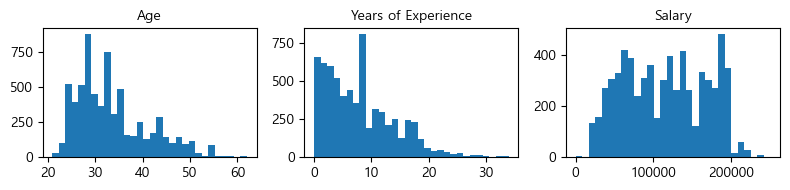

In [101]:
# 연속형 변수 히스토그램
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(8,2))
for i, feature in zip(range(3), ['Age', 'Years of Experience', 'Salary']):
    col = i % 3
    ax[col].hist(feature, bins=30, data=df)
    ax[col].set_title(feature, fontsize=10)
    
plt.tight_layout();

In [102]:
# 범주형 변수
print(df['Gender'].value_counts())
print('-'*40)
print(df['Education Level'].value_counts())
print('-'*40)
print(df['Job Title'].value_counts())

Male      3674
Female    3014
Other       14
Name: Gender, dtype: int64
----------------------------------------
Bachelor's Degree    2267
Master's Degree      1573
PhD                  1368
Bachelor's            756
High School           448
Master's              288
phD                     1
Name: Education Level, dtype: int64
----------------------------------------
Software Engineer                     518
Data Scientist                        453
Software Engineer Manager             376
Data Analyst                          363
Senior Project Engineer               318
                                     ... 
Senior Account Executive                1
Senior Human Resources Coordinator      1
Customer Service Rep                    1
Director                                1
Director of Sales                       1
Name: Job Title, Length: 193, dtype: int64


In [103]:
# Education Level 전처리
df.loc[df['Education Level'] == "Bachelor's", 'Education Level'] = "Bachelor's Degree"
df.loc[df['Education Level'] == "Master's", 'Education Level'] = "Master's Degree"
df.loc[df['Education Level'] == "phD", 'Education Level'] = "PhD"

# Gender의 Other 제거
df=df.drop(df.loc[df['Gender']=='Other'].index)

# 결측치 대체
df = df.fillna(df.mean())
df.loc[df['Gender'].isna(), 'Gender'] = 'Female'
df.loc[df['Education Level'].isna(), 'Education Level'] = "Bachelor's Degree"
df.loc[df['Job Title'].isna(), 'Job Title'] = "Software Engineer"
df.isna().sum()

Age                    0
Gender                 0
Education Level        0
Job Title              0
Years of Experience    0
Salary                 0
dtype: int64

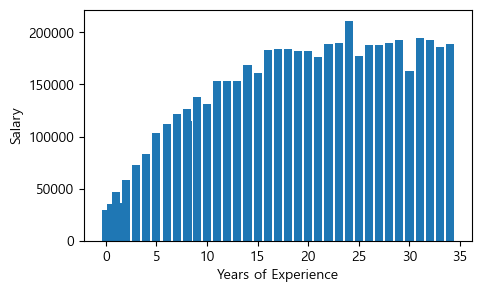

In [104]:
# 연차에 따른 평균 연봉
group_df1 = df.groupby('Years of Experience', as_index=False).Salary.mean()
plt.figure(figsize=(5,3))
plt.bar(group_df1['Years of Experience'], group_df1['Salary'])
plt.xlabel('Years of Experience')
plt.ylabel('Salary');

In [105]:
# 상위 연봉을 갖는 직업군
group_df2 = df.groupby('Job Title', as_index=False).Salary.mean()
group_df2.sort_values('Salary', ascending=False).head(10)

,Job Title,Salary
9,Chief Technology Officer,250000.000000
7,CEO,250000.000000
8,Chief Data Officer,220000.000000
28,Director of Data Science,204561.403509
190,VP of Finance,200000.000000
26,Director,200000.000000
191,VP of Operations,190000.000000
102,Operations Director,190000.000000
33,Director of Human Resources,187500.000000
96,Marketing Director,183984.375000


In [106]:
# 하위 연봉을 갖는 직업군
group_df2.sort_values('Salary').head(10)

,Job Title,Salary
61,Junior Business Operations Analyst,17675.000000
112,Receptionist,25000.000000
21,Delivery Driver,28000.000000
83,Junior Sales Associate,28211.267606
92,Juniour HR Coordinator,32000.000000
15,Customer Service Representative,33333.333333
19,Data Entry Clerk,35000.000000
49,Help Desk Analyst,35000.000000
63,Junior Customer Support Specialist,35000.000000
87,Junior Software Developer,35810.344828


In [107]:
# 성별 평균 연봉
df.groupby('Gender').Salary.mean()

Gender
Female    107896.375218
Male      121386.558457
Name: Salary, dtype: float64

In [108]:
df.corr()

,Age,Years of Experience,Salary
Age,1.000000,0.937468,0.728268
Years of Experience,0.937468,1.000000,0.810935
Salary,0.728268,0.810935,1.000000


[해석]
1. 결측치 존재 여부
    - 연속형 변수의 결칙는 각 변수들의 평균으로 대체했고, 범주형 변수는 최빈값으로 대체하였다.
1. 데이터 구성
    - 종속변수인 Salary는 float형으로 구성됐고, 독립변수는 object, float형으로 구성되었다.
1. 독립변수와 종속변수의 상관관계
    - Age와 Years of Experience 모두 종속변수와 높은 상관성(각각 0.73, 0.81)을 보이고 있다.
1. 독립변수 간 상관관계
    - Age와 Years of Experience 간에 높은 상관성(0.94)이 보이므로 다중공선성을 의심할 수 있다.
1. 주의사항
    - 다중공선성 문제를 주의하여야 한다. 따라서 두 변수 중 하나만 사용하거나 다중공선성 문제를 해결할 수 있는 모델을 사용한다. 예를 들어 랜덤포레스트, XGBoost, SVM 등이 있을 것이다.
    - 수치형 연속변수의 단위가 서로 상이하므로 스케일링을 통해 값의 범위를 맞추는 방법을 고려할 수 있을 것이다.

## 2. 통계 분석
### 1) 일표본 t-test(모분산 모름, 유의수준 5%)
- 귀무가설: 평균 나이는 35세이다.
- 대립가설: 평균 나이는 35세가 아니다.

In [109]:
import scipy.stats as stats
stats_df = df.copy()
np.random.seed(1234)
sample = np.random.choice(stats_df['Age'], 23)
stats.shapiro(sample) # 정규성 만족
print(stats.ttest_1samp(sample, popmean=35)) # 귀무가설 채택
print('신뢰구간: ', stats.t.interval(alpha=0.95, df=23-1, loc=np.mean(sample), scale=stats.sem(sample)))

Ttest_1sampResult(statistic=0.2481368795563765, pvalue=0.8063299700362077)
신뢰구간:  (31.481062474079174, 39.47545926505126)


### 2) 독립표본 t-test(모분산 모름, 유의수준 5%)
- 귀무가설: 성별에 따라 평균 연봉에 차이가 없다.
- 대립가설: 성별에 따라 평균 연봉에 차이가 있다.

In [110]:
np.random.seed(1234)
a_sample = np.random.choice(stats_df.loc[df['Gender']=='Male', 'Salary'], 20)
b_sample = np.random.choice(stats_df.loc[df['Gender']=='Female', 'Salary'], 23)
stats.shapiro(a_sample) # 정규성 만족 안 함
stats.shapiro(b_sample) # 정규성 만족 안 함
print(stats.mannwhitneyu(a_sample, b_sample)) # 귀무가설 기각

def sp(data1, data2):
    df = len(data1) + len(data2) -2
    s1 = (len(data1)-1) * (data1.std()**2)
    s2 = (len(data2)-1) * (data2.std()**2)
    sp = np.sqrt((s1+s2)/df)
    return sp

alpha=0.95
dof=len(a_sample) + len(b_sample) -2
diff_mean= np.mean(a_sample) - np.mean(b_sample)
s = sp(a_sample, b_sample)*(1/len(a_sample) + 1/len(b_sample))
print('신뢰구간: ', stats.t.interval(alpha, dof, loc=diff_mean, scale=s))

MannwhitneyuResult(statistic=250.5, pvalue=0.625733804325916)
신뢰구간:  (-6607.083900556287, 15757.170857078016)


### 3) 독립성 검정
#### (1) 성별과 직군(Job Title) 상관성

In [113]:
tab1 = pd.crosstab(stats_df['Gender'], stats_df['Job Title'])
chi, p, dff, expects = stats.chi2_contingency(tab1)
print(f'검정통계량: {chi} / p-value: {p}') # 귀무가설 기각

검정통계량: 1468.8027749853882 / p-value: 2.3076571688581527e-195


In [114]:
result = stats_df.groupby(['Gender', 'Job Title'])['Job Title'].count().reset_index(name='Frequency')
result['Total'] = result.groupby('Gender')['Frequency'].transform('sum')
result['Ratio'] = result['Frequency'] / result['Total']
result_sorted = result.sort_values(by=['Gender', 'Frequency'], ascending=[True, False])
print(result_sorted[result_sorted['Gender']=='Female'].head())
print('-'*65)
print(result_sorted[result_sorted['Gender']=='Male'].head())

     Gender              Job Title  Frequency  Total     Ratio
12   Female         Data Scientist        202   3016  0.066976
124  Female      Software Engineer        195   3016  0.064655
67   Female      Marketing Manager        181   3016  0.060013
29   Female    Full Stack Engineer        163   3016  0.054045
65   Female  Marketing Coordinator        157   3016  0.052056
-----------------------------------------------------------------
    Gender                  Job Title  Frequency  Total     Ratio
255   Male          Software Engineer        325   3674  0.088459
256   Male  Software Engineer Manager        276   3674  0.075122
145   Male             Data Scientist        251   3674  0.068318
144   Male               Data Analyst        234   3674  0.063691
244   Male    Senior Project Engineer        213   3674  0.057975


In [115]:
print(result_sorted[result_sorted['Gender']=='Female'].tail())
print('-'*65)
print(result_sorted[result_sorted['Gender']=='Male'].tail())

     Gender             Job Title  Frequency  Total     Ratio
126  Female      Software Manager          1   3016  0.000332
127  Female  Supply Chain Analyst          1   3016  0.000332
128  Female   Training Specialist          1   3016  0.000332
129  Female           UX Designer          1   3016  0.000332
130  Female         UX Researcher          1   3016  0.000332
-----------------------------------------------------------------
    Gender                     Job Title  Frequency  Total     Ratio
260   Male           Technical Recruiter          1   3674  0.000272
261   Male  Technical Support Specialist          1   3674  0.000272
262   Male              Technical Writer          1   3674  0.000272
263   Male                 VP of Finance          1   3674  0.000272
264   Male              VP of Operations          1   3674  0.000272


#### (2) 성별과 교육수준 상관성

In [116]:
tab2 = pd.crosstab(stats_df['Gender'], stats_df['Education Level'])
chi, p, dff, expects = stats.chi2_contingency(tab2)
print(f'검정통계량: {chi} / p-value: {p}') # 귀무가설 기각

검정통계량: 221.18315104980925 / p-value: 1.1141802276203628e-47


In [117]:
result = stats_df.groupby(['Gender', 'Education Level'])['Education Level'].count().reset_index(name='Frequency')
result['Total'] = result.groupby('Gender')['Frequency'].transform('sum')
result['Ratio'] = result['Frequency'] / result['Total']
result_sorted = result.sort_values(by=['Gender', 'Frequency'], ascending=[True, False])
print(result_sorted[result_sorted['Gender']=='Female'])
print('-'*60)
print(result_sorted[result_sorted['Gender']=='Male'])

   Gender    Education Level  Frequency  Total     Ratio
0  Female  Bachelor's Degree       1201   3016  0.398210
2  Female    Master's Degree       1068   3016  0.354111
3  Female                PhD        496   3016  0.164456
1  Female        High School        251   3016  0.083223
------------------------------------------------------------
  Gender    Education Level  Frequency  Total     Ratio
4   Male  Bachelor's Degree       1825   3674  0.496734
7   Male                PhD        873   3674  0.237616
6   Male    Master's Degree        791   3674  0.215297
5   Male        High School        185   3674  0.050354


### 4) 일원배치 분산분석
- 귀무가설: 학력에 따라 평균 연봉에 차이가 없다.
- 대립가설: 적어도 하나의 학력에 대해 평균 연봉에 차이가 있다.

In [122]:
target_lst = stats_df['Education Level'].unique() # ""Bachelor's Degree", "Master's Degree", 'PhD', 'High School'
bachelor = stats_df[stats_df['Education Level']==target_lst[0]]['Salary']
master = stats_df[stats_df['Education Level']==target_lst[1]]['Salary']
phd = stats_df[stats_df['Education Level']==target_lst[2]]['Salary']
high = stats_df[stats_df['Education Level']==target_lst[3]]['Salary']

# 정규성 모두 만족 못 함
print(stats.shapiro(bachelor))
print(stats.shapiro(master))
print(stats.shapiro(phd))
print(stats.shapiro(high))

stats.kruskal(bachelor, master, phd, high) # 귀무가설 기각

ShapiroResult(statistic=0.9236940145492554, pvalue=1.0720270460547306e-36)
ShapiroResult(statistic=0.9774220585823059, pvalue=1.5224926212484437e-16)
ShapiroResult(statistic=0.9128551483154297, pvalue=2.520624562997954e-27)
ShapiroResult(statistic=0.5219424962997437, pvalue=1.1818396693280262e-32)


KruskalResult(statistic=2851.8993251658017, pvalue=0.0)

group1,group2,meandiff,p-adj,lower,upper,reject
Bachelor's Degree,High School,-60695.6522,-0.0,-65955.1661,-55436.1382,True
Bachelor's Degree,Master's Degree,34959.1733,-0.0,31933.5286,37984.8179,True
Bachelor's Degree,PhD,70540.1934,-0.0,67195.9103,73884.4766,True
High School,Master's Degree,95654.8254,-0.0,90191.3601,101118.2908,True
High School,PhD,131235.8456,-0.0,125589.6825,136882.0088,True
Master's Degree,PhD,35581.0202,-0.0,31924.3555,39237.6848,True


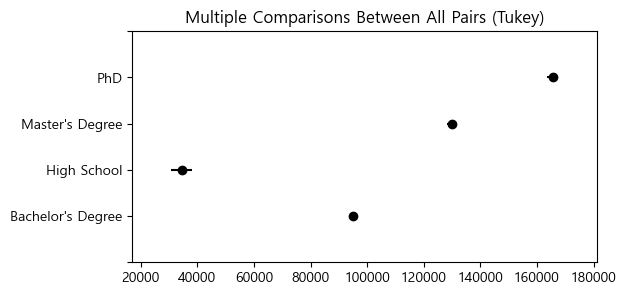

In [130]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison
mc = MultiComparison(data=stats_df['Salary'], groups=stats_df['Education Level'])
tuekeyhsd = mc.tukeyhsd(alpha=0.05)
fig = tuekeyhsd.plot_simultaneous(figsize=(6, 3))
tuekeyhsd.summary()

## 3. 머신러닝

In [146]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error

# 원핫인코딩
onehot_df = pd.get_dummies(data=df, columns=['Gender', 'Education Level', 'Job Title'], drop_first=True)
onehot_df

# 데이터 분할
X = onehot_df.drop('Salary', axis=1)
y = onehot_df.Salary
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1234)

# 스케일링
scaler = StandardScaler()
X_train_sc = X_train.copy()
X_test_sc = X_test.copy()
X_train_sc.iloc[:, :2] = scaler.fit_transform(X_train_sc.iloc[:, :2])
X_test_sc.iloc[:, :2] = scaler.transform(X_test_sc.iloc[:, :2])

print(X_train_sc.shape)
print(X_test_sc.shape)
print(y_train.shape)
print(y_test.shape)

(5017, 198)
(1673, 198)
(5017,)
(1673,)


In [ ]:
# 모델 객체 생성
svr = SVR()
rfr_reg = RandomForestRegressor(random_state=1234)
knn_reg = KNeighborsRegressor()

# 교차검증
scores = cross_val_score(estimator=svr, cv=5, X= X_train_sc, y=y_train, scoring='r2')

In [ ]:
scores